In [31]:
# Helpers
import numpy as np
import pandas as pd
import pickle
import base64

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import analyzer
from tokenizer import create_bag_of_words

# Plots
import matplotlib.pyplot as plt
#import seaborn as sns

#DB
import psycopg2

## Data

In [3]:
## Cleaning database
last_id = 132
# problems = Problem.objects.filter(id__gt=last_id)
# # solutions_obj = Solution.objects.filter(problem__in=problems).update(ignore=True)
# print("Problems to be ignored: %d" % problems.count())

problems = Problem.objects.filter(id__lte=last_id)
# problems = Problem.objects.all()
print("Problems to be used: %d" % problems.count())

solutions_obj = Solution.objects.filter(problem__in=problems, ignore=False).order_by('id')
# solutions_obj = Solution.objects.all().order_by('id')
print("Solutions to be used: %d" % solutions_obj.count())

docs_id = []
questions = []
solutions = []

# Fill separated structures
for sol in solutions_obj:
    docs_id.append(sol.id)
    questions.append(sol.problem.content)
    solutions.append(sol.content)

print("Got %d documents" %(solutions_obj.count()))

Problems to be used: 132
Solutions to be used: 54
Got 54 documents


### Average terms/document

In [4]:
def get_avg_terms(ngrams):
    print(ng)
    analyzer.vectorizer_params = {'ngram_range': ngrams}
    vectorizer = CountVectorizer(analyzer=analyzer.python_analyzer)
    train_data_features = vectorizer.fit_transform(solutions)
    tokens = np.asarray(train_data_features.sum(axis=1)).reshape(-1)
    total = tokens.sum()
    vocab = train_data_features.shape[1]
    summary = {"max": tokens.max(),
               "argmax": tokens.argmax(),
               "min": tokens.min(),
               "argmin": tokens.argmin(),
               "avg": tokens.mean(),
               "total": total,
               "vocab": vocab,
               "sparsity": 100 * total / (vocab * train_data_features.shape[0])}
    plt.figure()
    n, bins, patches = plt.hist(tokens, alpha=0.7)
    plt.show()
    return summary

(1, 1)


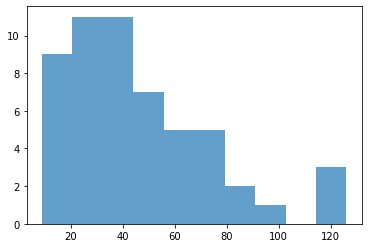

(1, 2)


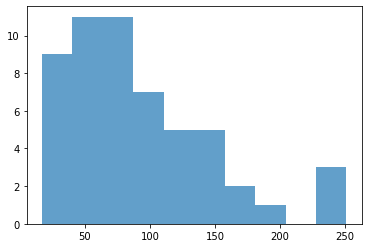

(1, 3)


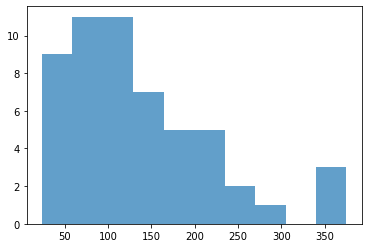

(2, 2)


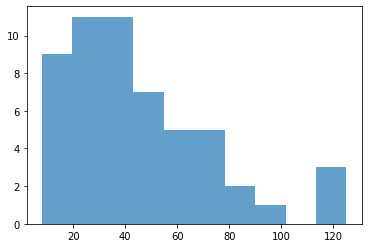

(2, 3)


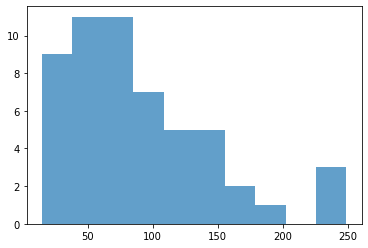

(3, 3)


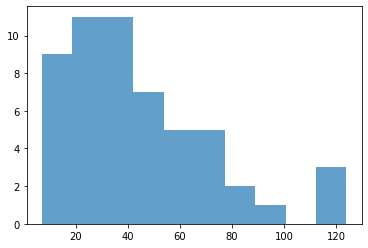

In [5]:
ngrams = [
    (1,1), # unigrams
    (1,2), # unigrams + bigrams
    (1,3), # unigrams + bigrams + trigrams
    (2,2), # bigrams
    (2,3), # bigrams + trigrams
    (3,3), # trigrams
]
summary = {}

for ng in ngrams:
    summary[ng] = get_avg_terms(ng)

In [6]:
summary

{(1, 1): {'max': 126,
  'argmax': 30,
  'min': 9,
  'argmin': 4,
  'avg': 46.77777777777778,
  'total': 2526,
  'vocab': 215,
  'sparsity': 21.757105943152453},
 (1, 2): {'max': 251,
  'argmax': 30,
  'min': 17,
  'argmin': 4,
  'avg': 92.55555555555556,
  'total': 4998,
  'vocab': 1112,
  'sparsity': 8.323341326938449},
 (1, 3): {'max': 375,
  'argmax': 30,
  'min': 24,
  'argmin': 4,
  'avg': 137.33333333333334,
  'total': 7416,
  'vocab': 2388,
  'sparsity': 5.750977107761027},
 (2, 2): {'max': 125,
  'argmax': 30,
  'min': 8,
  'argmin': 4,
  'avg': 45.77777777777778,
  'total': 2472,
  'vocab': 897,
  'sparsity': 5.103431190387712},
 (2, 3): {'max': 249,
  'argmax': 30,
  'min': 15,
  'argmin': 4,
  'avg': 90.55555555555556,
  'total': 4890,
  'vocab': 2173,
  'sparsity': 4.1673058240016365},
 (3, 3): {'max': 124,
  'argmax': 30,
  'min': 7,
  'argmin': 4,
  'avg': 44.77777777777778,
  'total': 2418,
  'vocab': 1276,
  'sparsity': 3.5092302333681644}}

## Get coherence from DB

In [7]:
%%time 
# Insert to DB
connection = psycopg2.connect(user = settings.DATABASES["default"]["USER"],
                          password = settings.DATABASES["default"]["PASSWORD"],
                          host = settings.DATABASES["default"]["HOST"],
                          port = settings.DATABASES["default"]["PORT"],
                          database = settings.DATABASES["default"]["NAME"])
connection.autocommit=True
cursor = connection.cursor()

CPU times: user 3.32 ms, sys: 0 ns, total: 3.32 ms
Wall time: 742 ms


In [8]:
%%time
select = "SELECT model FROM EXPERIMENTS_2020_01_27 limit 10;"
cursor.execute(select)
row = cursor.fetchone()

CPU times: user 2.37 ms, sys: 151 µs, total: 2.52 ms
Wall time: 1.48 s


In [9]:
base64.b64decode(row[0])

b'\x80\x03csklearn.decomposition._nmf\nNMF\nq\x00)\x81q\x01}q\x02(X\x0c\x00\x00\x00n_componentsq\x03K\x07X\x04\x00\x00\x00initq\x04NX\x06\x00\x00\x00solverq\x05X\x02\x00\x00\x00cdq\x06X\t\x00\x00\x00beta_lossq\x07X\t\x00\x00\x00frobeniusq\x08X\x03\x00\x00\x00tolq\tG?\x1a6\xe2\xeb\x1cC-X\x08\x00\x00\x00max_iterq\nK\xc8X\x0c\x00\x00\x00random_stateq\x0b\x8a\x05\xbf\x14&\xe5\x00X\x05\x00\x00\x00alphaq\x0cG\x00\x00\x00\x00\x00\x00\x00\x00X\x08\x00\x00\x00l1_ratioq\rG\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00verboseq\x0eK\x00X\x07\x00\x00\x00shuffleq\x0f\x89X\x13\x00\x00\x00reconstruction_err_q\x10cnumpy.core.multiarray\nscalar\nq\x11cnumpy\ndtype\nq\x12X\x02\x00\x00\x00f8q\x13K\x00K\x01\x87q\x14Rq\x15(K\x03X\x01\x00\x00\x00<q\x16NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x17bC\x08 \x1e\x12\xa5\xc7\xc2\x93?q\x18\x86q\x19Rq\x1aX\r\x00\x00\x00n_components_q\x1bK\x07X\x0b\x00\x00\x00components_q\x1ccnumpy.core.multiarray\n_reconstruct\nq\x1dcnumpy\nndarray\nq\x1eK\x00\x85q\x1fC\x01bq 

In [10]:
while row:
    model = pickle.loads(base64.b64decode(row[0]))
    print(model)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_compo

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=3844478143, shuffle=False, solver='cd',
    tol=0.0001, verbose=0)
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=38444

KeyboardInterrupt: 

In [86]:
cols_experiment = ['experiment_id', 'k', 'dataset', 'min_df', 'is_binary', 'vectorizer', 'ngrams', 'token', 'method', 'coherence_med5', 'coherence_med10','coherence_med15']
cols_experiment_sql = ["EXPERIMENTS_2020_01_27.%s" % item for item in cols_experiment]

select_query = '''SELECT %s FROM EXPERIMENTS_2020_01_27 where dataset like 'solution%%' order by coherence_med5 desc, coherence_med15 desc, coherence_med10 desc  '''  % ", ".join(cols_experiment_sql)

cursor.execute(select_query)
r = cursor.fetchall()

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(r, columns=cols_experiment)

In [ ]:
df

### Comparing paper reported result with top-15 coherence reruns

| Experiment ID | Min DF | Binary | Vectorizer | Method | Best k | Table|
|---------------|--------|--------|------------|--------|--------|--------
| 26            | 0.05   | True   | Count      | LDA    | 12     | experiments_solution (original)
| 24            | 0.05   | True   | Count      | NMF    | 15     |
1. Exercises in same cluster

In [61]:
def get_where_items(exp_id, cols, table):
    query = "SELECT %s from %s where experiment_id = %s" % (", ".join(cols), table, exp_id) 
    cursor.execute(query)
    where_items = cursor.fetchall()
    return where_items

def assign_to_cluster(exp_id, cols, table, solutions, exercise_sol):
    where_items = get_where_items(exp_id, cols, table)
    v = eval(where_items[0][0])
    m = where_items[0][1]
    b = where_items[0][2]
    if len(where_items[0]) == 5:
        ng = where_items[0][4]
        vectorizer_params={'ngram_range': ng}
    else:
        vectorizer_params={'ngram_range': (1,3)}
    model_db = pickle.loads(base64.b64decode(where_items[0][3]))
    _, vectorizer, _ = create_bag_of_words(solutions, v, binary=b, min_df=m, vectorizer_params=vectorizer_params)
    train_data_features = vectorizer.transform(exercise_sol)
    document_topic = model_db.transform(train_data_features)
    document_clusters = document_topic.argmax(axis=1)
    return document_clusters

def get_cluster_sets(clusters1, clusters2):
    heatmap = np.zeros((clusters1.shape[0], clusters2.shape[0]))
    idx_sorted = np.argsort(clusters1)
    for i, idx  in enumerate(idx_sorted):
        # Get element cluster
        c1 = clusters1[idx]
        # Get in which cluster from clusters 2 the same element is
        c2_ref = clusters2[idx]
        for j, jdx in enumerate(idx_sorted):
            # Now, compare to another element in cluster 2
            c2 = clusters2[jdx]
            if c2 == c2_ref:
                heatmap[i,j] += 1
    fig, ax = plt.subplots(figsize=(18,18))
    im = ax.imshow(heatmap)
    ax.set_xticks(idx_sorted)
    ax.set_yticks(idx_sorted)
    fig.tight_layout()
    plt.show()
    return heatmap
                

('CountVectorizer', 0.05, True, <memory at 0x7f4a9dab7b88>)
('CountVectorizer', 0.05, True, <memory at 0x7f4a9c0ba708>, [1, 3])


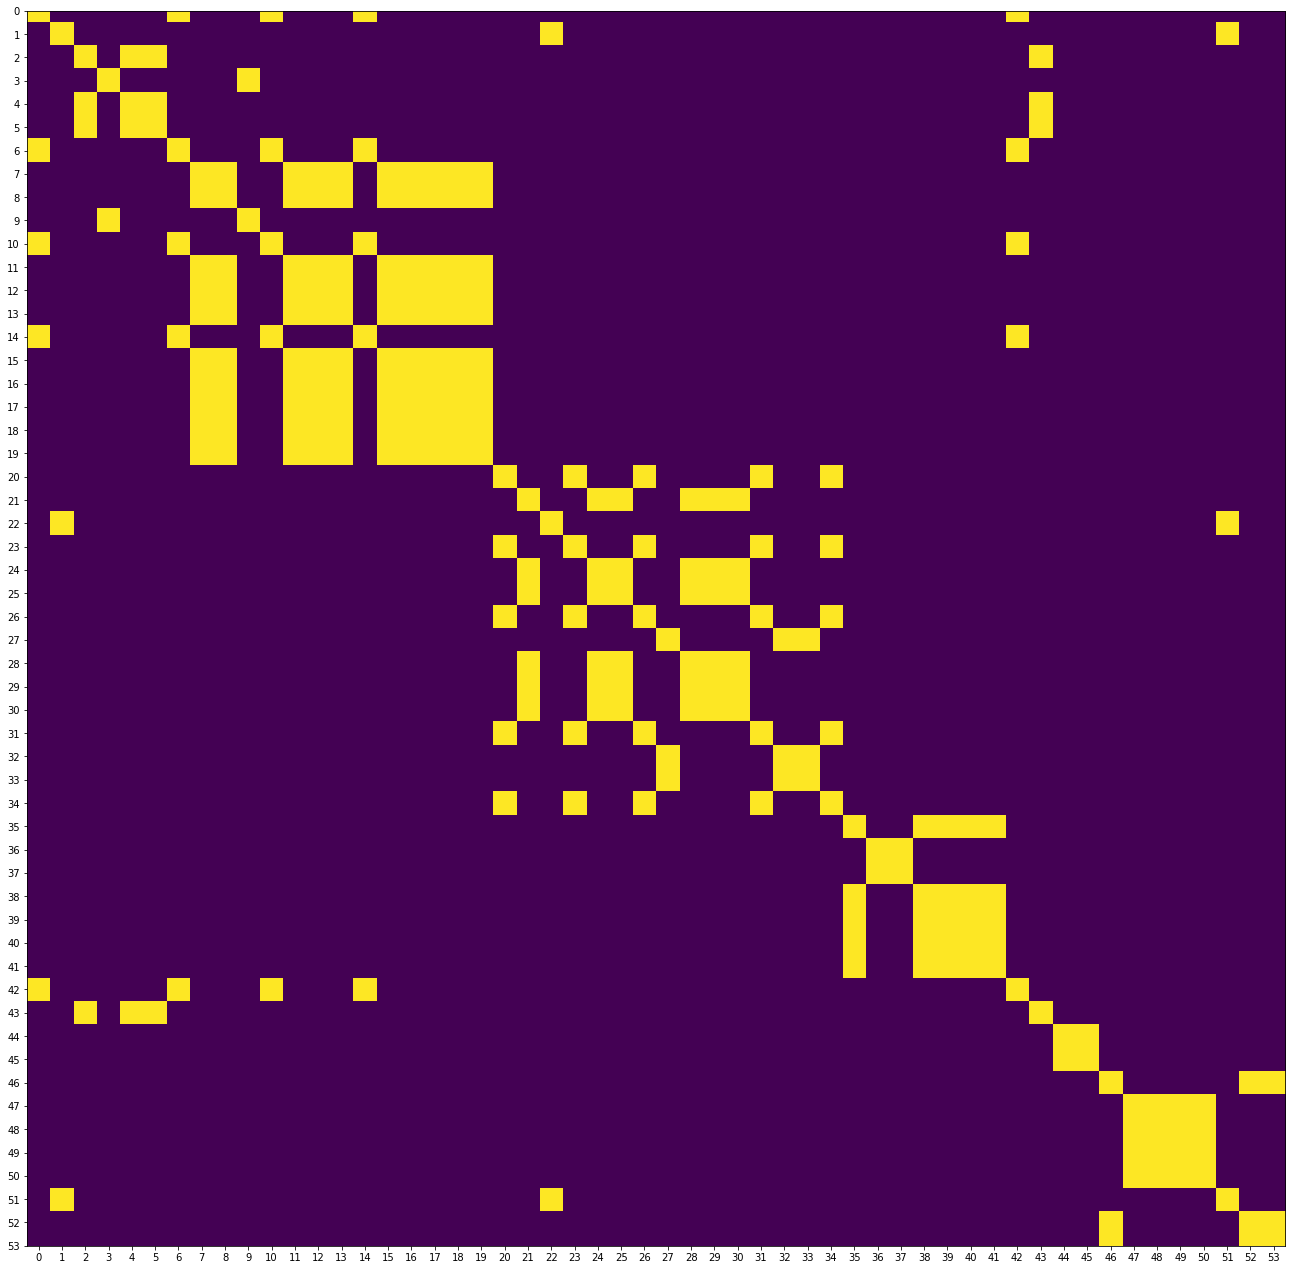

282.0

In [66]:
exp_id = 26
cols = ["vectorizer", "min_df", "is_binary", "model"]
table = "experiments_solution"
print(get_where_items(exp_id, cols, table)[0])
clusters1 = assign_to_cluster(exp_id, cols, table, solutions, solutions)

exp_id = 79
cols = ["vectorizer", "min_df", "is_binary", "model", "ngrams"]
table = "experiments_2020_01_27"
get_where_items(exp_id, cols, table)
print(get_where_items(exp_id, cols, table)[0])
clusters2 = assign_to_cluster(exp_id, cols, table, solutions, solutions)

heatmap = get_cluster_sets(clusters1, clusters2)
heatmap.sum()

In [64]:
exp_id = 26
cols = ["vectorizer", "min_df", "is_binary", "model"]
table = "experiments_solution"
print(get_where_items(exp_id, cols, table)[0])
clusters1 = assign_to_cluster(exp_id, cols, table, solutions, solutions)

exp_id = 78030
cols = ["vectorizer", "min_df", "is_binary", "model", "ngrams"]
table = "experiments_2020_01_27"
get_where_items(exp_id, cols, table)
print(get_where_items(exp_id, cols, table)[0])
clusters2 = assign_to_cluster(exp_id, cols, table, solutions, solutions)

heatmap = get_cluster_sets(clusters1, clusters2)
heatmap.sum()

('CountVectorizer', 0.05, True, <memory at 0x7f4a9dab7b88>)


/data2/miniconda3/envs/machineteaching/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.20.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


('CountVectorizer', 0.05, True, <memory at 0x7f4a9c0ba588>, [1, 3])


ModuleNotFoundError: No module named 'numpy.random._pickle'

In [65]:
exp_id = 26
cols = ["vectorizer", "min_df", "is_binary", "model"]
table = "experiments_solution"
print(get_where_items(exp_id, cols, table)[0])
clusters1 = assign_to_cluster(exp_id, cols, table, solutions, solutions)

exp_id = 29310
cols = ["vectorizer", "min_df", "is_binary", "model", "ngrams"]
table = "experiments_2020_01_27"
get_where_items(exp_id, cols, table)
print(get_where_items(exp_id, cols, table)[0])
clusters2 = assign_to_cluster(exp_id, cols, table, solutions, solutions)

heatmap = get_cluster_sets(clusters1, clusters2)
heatmap.sum()

('CountVectorizer', 0.05, True, <memory at 0x7f4a9dab7b88>)
('CountVectorizer', 0.05, True, <memory at 0x7f4a9c0ba648>, [1, 3])


ModuleNotFoundError: No module named 'numpy.random._pickle'